In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
path = "https://compbio.fmph.uniba.sk/vyuka/pridav/data/nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [3]:
# Iba na zaklade Weight, Height
Y = data["Gender"].to_numpy()
X = data[["Weight", "Height"]].to_numpy()

# Trenovacia a validacna
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train

array([[-0.28488927,  0.24470298],
       [-0.18274673, -0.05270487],
       [ 0.36201347, -0.25097678],
       ...,
       [-1.01934275, -0.64752058],
       [ 2.1130284 ,  0.93865463],
       [-1.16526066, -0.54838463]])

In [4]:
# Logisticka regresia
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# intercept, Weight, Height
print(logreg.intercept_, logreg.coef_)
print(np.exp(logreg.coef_))

[-0.00932387] [[-0.13696179  2.50872951]]
[[ 0.87200354 12.28930666]]


Text(0, 0.5, 'Height')

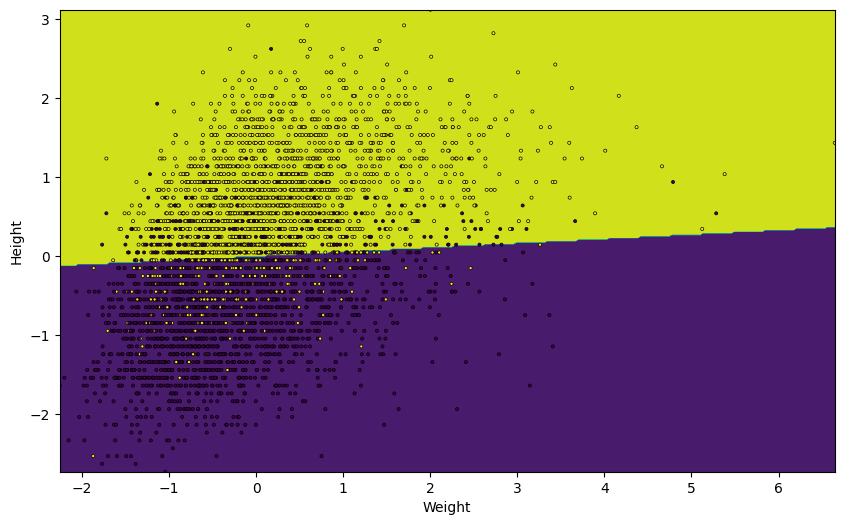

In [5]:
# Rozhodovacia hranica
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')



In [6]:
# S kvadratickymi clenmi (a interakciou)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Logisticka regresia
logreg2 = LogisticRegression(max_iter=100000)
logreg2.fit(X_train_poly, y_train)

X_train_poly

array([[-2.84889269e-01,  2.44702979e-01,  8.11618955e-02,
        -6.97132526e-02,  5.98795477e-02],
       [-1.82746731e-01, -5.27048739e-02,  3.33963678e-02,
         9.63164343e-03,  2.77780373e-03],
       [ 3.62013468e-01, -2.50976776e-01,  1.31053751e-01,
        -9.08569730e-02,  6.29893418e-02],
       ...,
       [-1.01934275e+00, -6.47520579e-01,  1.03905965e+00,
         6.60045409e-01,  4.19282900e-01],
       [ 2.11302840e+00,  9.38654634e-01,  4.46488900e+00,
         1.98340390e+00,  8.81072522e-01],
       [-1.16526066e+00, -5.48384628e-01,  1.35783241e+00,
         6.39011035e-01,  3.00725700e-01]])

Text(0, 0.5, 'Height')

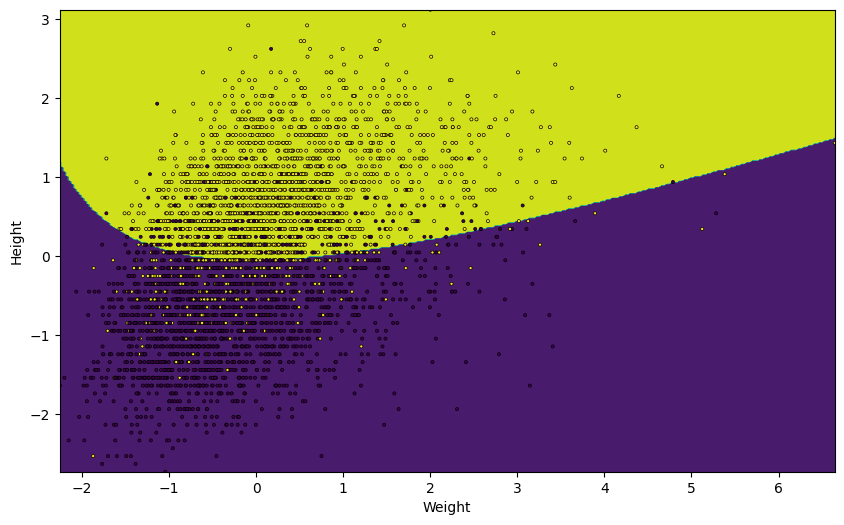

In [7]:
# Rozhodovacia hranica

Z = logreg2.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [8]:
# Kvalita predikcie (1. model)
y_pred = logreg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
conf_matrix = confusion_matrix(y_val, y_pred)

print(accuracy)
print(conf_matrix) # viac o mierach kvality: cvicenia

0.8162650602409639
[[413  97]
 [ 86 400]]


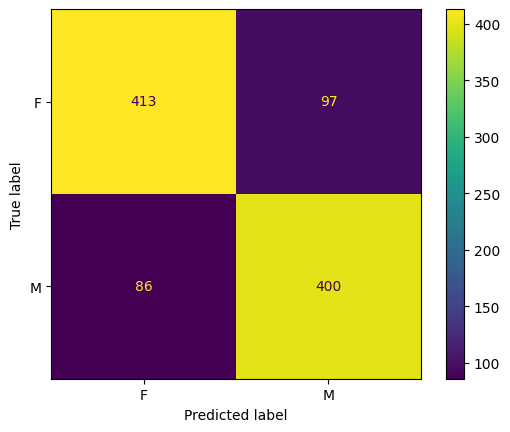

In [9]:
# Vykreslenie
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["F", "M"])
cm_display.plot()

accuracy: 0.820281124497992


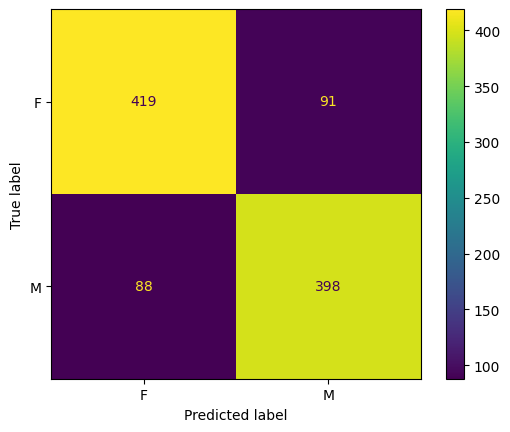

In [10]:
# Pre kvadraticky model
y_pred = logreg2.predict(X_val_poly)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("accuracy:", accuracy)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["F", "M"])
cm_display.plot()